In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

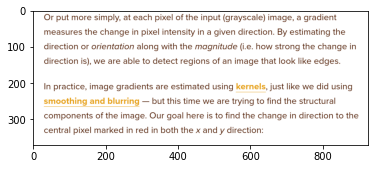

In [2]:
# Based on https://pyimagesearch.com/2021/05/12/image-gradients-with-opencv-sobel-and-scharr/
# More specific explanation of how image gradients works, how it is able to detect edges
image_gradient_img = cv2.imread('Photos/How Image Gradient works.png')
fig, ax = plt.subplots()
ax.imshow(image_gradient_img)
plt.show()

In [15]:
img = cv2.imread('Photos/Uppsala Sunset.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


# Set the kernel size, depending on we are using the Sobel operator or the Scharr operator
# Compute the gradients along the x and y axis.
def sobel_scharr(image, ksize):
    gX = cv2.Sobel(image, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
    gY = cv2.Sobel(image, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

    # the gradient magnitude images are now the floating point data
    # => need to convert to unsigned integer so that opencv can operate and visualize
    gX = cv2.convertScaleAbs(gX)
    gY = cv2.convertScaleAbs(gY)

    # combine the gradient representation into a single image
    combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

    cv2.imshow("Sobel/Scharr X", gX)
    cv2.imshow("Sobel/Scharr Y", gY)
    cv2.imshow("Sobel/Scharr Combined", combined)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [16]:
# Scharr
ksize = -1
sobel_scharr(gray, ksize)

In [17]:
# Sobel
ksize = 3
sobel_scharr(gray, ksize)

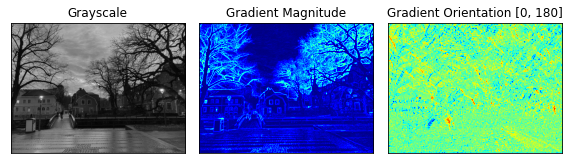

In [11]:
# Compute gradient magnitude and orientation

# Compute gradients along the x and y axis
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1)

# Compute the gradient magnitude and orientation
magnitude = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

(fig, axs) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
# plot each of the images
axs[0].imshow(gray, cmap="gray")
axs[1].imshow(magnitude, cmap="jet")
axs[2].imshow(orientation, cmap="jet")
# set the titles of each axes
axs[0].set_title("Grayscale")
axs[1].set_title("Gradient Magnitude")
axs[2].set_title("Gradient Orientation [0, 180]")
# loop over each of the axes and turn off the x and y ticks
for i in range(0, 3):
	axs[i].get_xaxis().set_ticks([])
	axs[i].get_yaxis().set_ticks([])
# show the plots
plt.tight_layout()
plt.show()

# Explanation:
# + In the display of the gradient magnitude:
#   - Values that are closer to the blue range are very small.
#   - Values that are closer to the yellow/red range are quite large

# + In the display of the gradient orientation
#   - Values closer to zero show as blue and values closer to 190 as red